<a href="https://colab.research.google.com/github/IfrazQazi/Play-Store-App-Review-Analysis-Capstone-Project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_Team_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## First importing libraries and mounting google drive.
## loading data into data frame

In [1]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading play store data into data frame
dir_path='/content/drive/MyDrive/AlmaBetter/Module 1/Capstone Project Play Store App Review Analysis/'
play_s_d=pd.read_csv(dir_path+'Play Store Data.csv')

In [5]:
# loading User Reviews into data frame
user_review=pd.read_csv(dir_path+'User Reviews.csv')

#The objective of this project is to deliver insights to understand customer demands better and help developer to populriaz the application

##Discussion of Google play store dataset will involve various steps such as:
## 1)loading the data into data frame
## 2)cleaning the data
## 3)extracting statistics from the dataset
## 4)exploratory analysis and visualizations
## 5)questions that can be asked from the dataset conclusion
#We can move to first step of data analysis by cleaning the data that will make the results more accurate.

In [6]:
play_s_d.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
play_s_d.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
play_s_d.shape

(10841, 13)

# Above dataframe having more than 10000 rows and 13 columns.

##Play store dataframe of app which consist of name of application ,category of app , rating  given by users , number of users review, size of app in(Mb/Kb) , number of installs of each app , type of app(free/paid), price of app, rating of content , genres of app , last updated, current version of application and requried android version

In [9]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [11]:
user_review.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [12]:
user_review.shape

(64295, 5)

In [13]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Above User_review dataframe is having more than 60000 rows and 5 columns:
## name of app , translated_review given by users, sentiment , sentiment polarity , sentiment subjective

## lets see first play store dataset


In [14]:
# Replacing space in columns with _

play_s_d.columns=[each.replace(" ","_") for each in play_s_d.columns]

In [15]:
play_s_d['App'].duplicated().any()

True

In [16]:
play_s_d['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
Tech CU Mobile Banking                               1
သိင်္ Astrology - Min Thein Kha BayDin               1
Don't touch my phone                                 1
Agent HQ for The Division                            1
INTERACTIVE CALCULUS FOR MATHS AND PHYSICS           1
Name: App, Length: 9660, dtype: int64

#**As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not**

In [17]:
play_s_d[play_s_d['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


#**As we can see from the above dataframe, ROBLOX app is having identical rows but with different category and difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app based on category with maximum number of reviews, assuming it to be the latest one.**

In [18]:
# Sorting Reviews column in descending order 
play_s_d.sort_values('Reviews',ascending=False,inplace=True)

In [19]:
# removing duplicate values in App column

play_s_d.drop_duplicates(subset=['App','Category'],inplace=True)

In [20]:
# checking if there is any duplicate value
play_s_d['App'].duplicated().any()

True

In [21]:
play_s_d[play_s_d['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


## Now we have successfully removed duplicate values from App column




In [22]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content_Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last_Updated    9745 non-null   object 
 11  Current_Ver     9737 non-null   object 
 12  Android_Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## **As we can see the play store dataset is having Review, Size of app, number of installs, and price is object data type and we can also see there is null value in some columns** 
## **now first i will convert Review, Size, Installs and price into numeric data type**

In [23]:
#Change reviews column datatype to int
play_s_d.Reviews = play_s_d.Reviews.apply(lambda x: float(str(x).replace('M', '')) if 'M' in str(x) else x) 
play_s_d.Reviews = play_s_d.Reviews.apply(lambda x:int(x))

In [24]:
# check data type of Reviews column and check if there is any null value
play_s_d['Reviews'].dtype  ,play_s_d['Reviews'].isna().any()

(dtype('int64'), False)

In [25]:
play_s_d['Size'].unique()[310:330]

array(['437k', '25k', '74k', '208k', '206k', '228k', '454k', '540k',
       '887k', '721k', '14k', '1,000+', '961k', '97k', '10.0M', '55k',
       '948k', '108k', '154k', '319k'], dtype=object)

##**As we can see from above that Size column has symbol of Mb Kb (+) (,) and  String of Varies with device**

In [26]:
#converting column "Size"  Mb Kb (,) (+) and  String of Varies with device to float using lamda function
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x) # 1 MB is equal to 1024 KB
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)


In [27]:
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: float(x))

In [28]:
play_s_d['Size'].describe()

count    8495.000000
mean       20.639314
std        24.381147
min         0.008301
25%         4.600000
50%        12.000000
75%        28.000000
max      1000.000000
Name: Size, dtype: float64

# Minimum Size is not zero so we can move forward

## so now i have successfully converted two columns.
## Reviews and Size are now numeric data type

In [29]:
play_s_d['Installs'].unique()

array(['1,000,000+', '100,000+', '500,000+', '50,000+', '10,000,000+',
       '5,000,000+', '10,000+', '50,000,000+', '100,000,000+', '5,000+',
       '1,000+', '1,000,000,000+', '500+', '10+', '100+', '50+',
       '500,000,000+', '5+', '1+', 'Free', '0+', '0'], dtype=object)

##**we can see that there is + and coma(,) symbol and Free string**
## **so i will remove those symbolys**
## **replace Free with nan**

In [30]:
play_s_d['Installs1']=play_s_d['Installs']

In [31]:
# converting column 'Installs'
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace('Free', 'NaN') if 'Free' in str(x) else x)
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
play_s_d['Installs']=play_s_d['Installs'].apply(lambda x: float(x))

In [32]:
play_s_d['Installs'].min(),play_s_d['Installs'].max()

(0.0, 1000000000.0)

In [33]:
# checking data type of Installs column
play_s_d['Installs'].dtype

dtype('float64')

## Now we have successfully converted Installs column into float so now we can move forward

## **Lets see Price column**

In [34]:
play_s_d['Price'].dtype

dtype('O')

In [35]:
play_s_d['Price'].describe()

count     9745
unique      93
top          0
freq      8986
Name: Price, dtype: object

In [36]:
play_s_d['Price'].min(),play_s_d['Price'].max()

('$0.99', 'Everyone')

## **As we can see there is dollar symbol and having string 'Everyone' and its data type is object**
## **so i will remove dollar symbol and replace Everyone with nan**

In [37]:
# converting column "Price" 
play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace('Everyone', 'NaN') if 'Everyone' in str(x) else x)

play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)

In [38]:
play_s_d['Price']=play_s_d['Price'].apply(lambda x: float(x))

In [39]:
play_s_d['Price'].describe()

count    9744.000000
mean        1.090734
std        16.778883
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

##Now we have successfully converted Price column into float so now we can move forward

In [40]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 4177
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   int64  
 4   Size            8495 non-null   float64
 5   Installs        9744 non-null   float64
 6   Type            9744 non-null   object 
 7   Price           9744 non-null   float64
 8   Content_Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last_Updated    9745 non-null   object 
 11  Current_Ver     9737 non-null   object 
 12  Android_Ver     9742 non-null   object 
 13  Installs1       9745 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


## **Now I have changed the data type of coulmns Reviews,Size,Installs,Price from object to float and integer data type.**



In [41]:
play_s_d.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size              1250
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
Installs1            0
dtype: int64

## **Lets move to replace missing values/Null values**

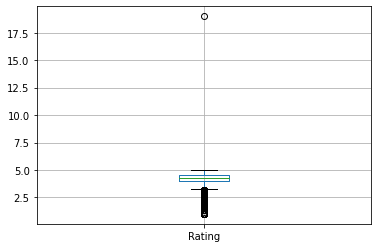

In [42]:
# Plotting Box plot to check outliers exists or not!
play_s_d.boxplot(column='Rating');

## There is an outlier

In [43]:
play_s_d['Rating'].max()

19.0

## we know that maximum rating should be 5 but the above output is having greater than 5 rating
##lets see how many rows are having rating greater than zero

In [44]:
play_s_d[play_s_d['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,Free


In [45]:
play_s_d.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size              1250
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
Installs1            0
dtype: int64

## As we can see from above two output that in row 10472  almost every column is having invalid data   

## It has only one row where rating is greater than 5 and Installs, Price,Content_Rating,Android_Ver is having Null value and Category , Type, Genres Last_Updated and Current_Ver is having invalid data so we can simply just drop that row 

In [46]:
play_s_d.drop([10472],inplace= True)

In [47]:
play_s_d[play_s_d['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1


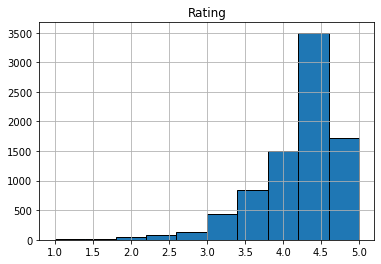

In [48]:
play_s_d.hist(column='Rating',edgecolor='black');

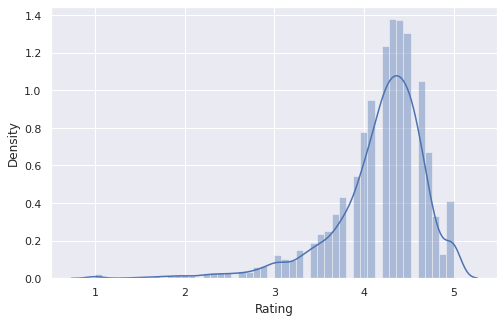

In [49]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(play_s_d.Rating);

### We recognized here from previous graph that our distribution appears as left skewed in direction.

In [50]:
''' Filling null values with median value because as we can see from the above distplot appeared as skewed to left. 
So the median is usually preferred in measures of central tendency when your data set is skewed '''

play_s_d['Rating'] = play_s_d['Rating'].fillna(play_s_d['Rating'].median())

In [51]:
play_s_d['Rating'].isna().any()

False

## now i have successfully removed null values in Rating column

In [52]:
play_s_d[play_s_d['Price'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1


In [53]:
play_s_d[play_s_d['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1
9148,Command & Conquer: Rivals,FAMILY,4.3,0,NaN,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0


In [54]:
play_s_d['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

## we can see that there is Three unique values of Type column
## i am thinking that replace nan with free if price is zero and paid if price is greater than zero

In [55]:
# replace nan with free if price is zero and paid if price is greater than zero
play_s_d.loc[play_s_d.Price == 0, 'Type'] = "Free"
play_s_d.loc[play_s_d.Price > 0, 'Type'] = "Paid"

In [56]:
play_s_d.Type.unique()

array(['Free', 'Paid'], dtype=object)

## now i have successfully replaced NaN  values with free and paid

In [57]:
play_s_d.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1250
Installs             0
Type                 0
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
Installs1            0
dtype: int64

## Lets move to the Size column

In [58]:
play_s_d[play_s_d['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,NaN,100000.0,Free,0.00,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up,"100,000+"
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,NaN,10000000.0,Free,0.00,Everyone,Communication,"July 30, 2018",Varies with device,Varies with device,"10,000,000+"
10383,Family Guy The Quest for Stuff,GAME,4.0,995002,NaN,10000000.0,Free,0.00,Mature 17+,Adventure,"July 25, 2018",1.73.0,4.1 and up,"10,000,000+"
996,Funny Pics,ENTERTAINMENT,3.9,9941,NaN,1000000.0,Free,0.00,Teen,Entertainment,"July 7, 2017",Varies with device,Varies with device,"1,000,000+"
731,English words application mikan,EDUCATION,4.7,9888,NaN,500000.0,Free,0.00,Everyone,Education,"July 30, 2018",Varies with device,4.1 and up,"500,000+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,EP McGuffey Primer,FAMILY,4.3,0,NaN,50.0,Paid,1.99,Everyone,Education,"July 16, 2018",Varies with device,Varies with device,50+
8384,DG Card,COMMUNICATION,4.3,0,NaN,100.0,Free,0.00,Everyone,Communication,"August 15, 2017",Varies with device,Varies with device,100+
8822,Simple x3DS Emulator - BETA,GAME,4.3,0,NaN,50000.0,Free,0.00,Everyone,Arcade,"June 13, 2018",Varies with device,Varies with device,"50,000+"
9025,KeePass DX,TOOLS,4.3,0,NaN,5000.0,Free,0.00,Everyone,Tools,"August 2, 2018",Varies with device,Varies with device,"5,000+"


## Let us replace the missing values of the Size Column with the Mean value of that entire column.

In [59]:
# lets see Mean of the Size column
play_s_d['Size'].mean()

20.52401321659038

In [60]:
# replacing null value in Size column with Mean
play_s_d['Size'].fillna(value=20.35, inplace = True)

In [61]:
# Check if there is any null value
play_s_d[play_s_d['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1


## so now we have succefully replaced null value in Column Size

## so now we have two columns which are having null values
## Android_Ver and Current_Ver

In [62]:
play_s_d[play_s_d['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,"1,000+"
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN,"10,000+"


In [63]:
play_s_d[play_s_d['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,0.642578,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,"1,000+"
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700000,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,"5,000+"
7407,Calculate My IQ,FAMILY,4.3,44,7.200000,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,"10,000+"
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700000,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,"500,000+"
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.010742,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,"1,000,000+"
7333,Dots puzzle,FAMILY,4.0,179,14.000000,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,"50,000+"
7730,UFO-CQ,TOOLS,4.3,1,0.231445,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,10+
6803,BT Master,FAMILY,4.3,0,0.216797,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up,100+


## I am thinking that in Android_Ver and Current_Ver columns i can replace null value with  the value that appears most often(mode)

In [64]:
# checking what is the mode of Android_Ver column
play_s_d['Android_Ver'].mode(dropna=True)

0    4.1 and up
dtype: object

In [65]:
# checking what is the mode of Current_Ver column
play_s_d['Current_Ver'].mode(dropna=True)

0    Varies with device
dtype: object

## Now I have found the mode of Android_Ver and Current_Ver

In [66]:
# replacing null value in column Android_ver with 4.1 and up
play_s_d['Android_Ver'].fillna('4.1 and up', inplace = True)

In [67]:
# replacing null value in column Current_ver with Varies with device
play_s_d['Current_Ver'].fillna('Varies with device', inplace = True)

In [68]:
play_s_d[play_s_d['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1


In [69]:
play_s_d[play_s_d['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1


In [70]:
play_s_d.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
Installs1         0
dtype: int64

## We have Successfully replaced null values in every column
## so now we dont have any column which is having null values

## **Lets move to user_review Dataframe**

In [71]:
user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [72]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [73]:
user_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [74]:
user_review.Sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [75]:
user_review.loc[user_review['Sentiment'].isna() & user_review['Sentiment_Polarity'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## there is lots of null values in all column in user review dataset

## droping null values from dataset user_review

In [76]:
# drop null values from dataset
user_review.dropna(inplace=True)

In [77]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


## **Merging two dataset**

In [78]:
merged_df = play_s_d.merge(user_review, on="App")


In [79]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",I'm grateful booking engine dreamtrips. I've a...,Positive,0.200000,0.200000
1,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+","This great app. I One book plane, hotel, dream...",Positive,0.850000,0.875000
2,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",Its slow rovia keeps going back disappointed g...,Negative,-0.137500,0.412500
3,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",Try get dreams trips Germany UK,Neutral,0.000000,0.000000
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",I cant open travelbook samsung handphone,Neutral,0.000000,0.500000
5,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",Best product ever. Make travelling easier stop...,Positive,1.000000,0.300000
6,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",This greatest.,Positive,1.000000,1.000000
7,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",The best eva able anything anytime... I jus love,Positive,0.666667,0.508333
8,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",Cant login,Neutral,0.000000,0.000000
9,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",TheOne™,Neutral,0.000000,0.000000


## in merged dataframe we have 4 new columns Translated_Review, Sentiment,Sentiment_Polarity, Sentiment_Subjectivity

# **DATA VISUALIZATION**

#  Correlation Map
### Let us find correlation between columns in a dataframe. Correlation map is used to detect the pairwise correlation between all quantitative measurables in a dataset. 

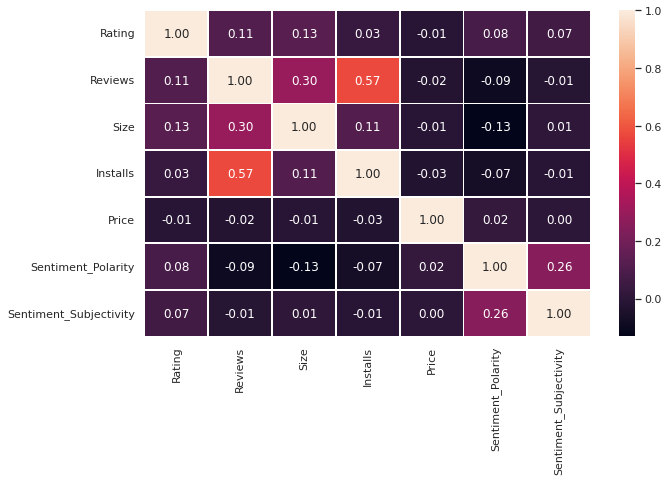

In [80]:
# Correlation Matrix using Heatmap
# Correlation map
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

# We can determine from above that **Installs** and **Reviews** are Positively Correlated.

##**Is sentiment subjectivity proportional to sentiment polarity?**

In [81]:
merged_df['Sentiment_Subjectivity1'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity1'] = merged_df['Sentiment_Polarity'].abs()

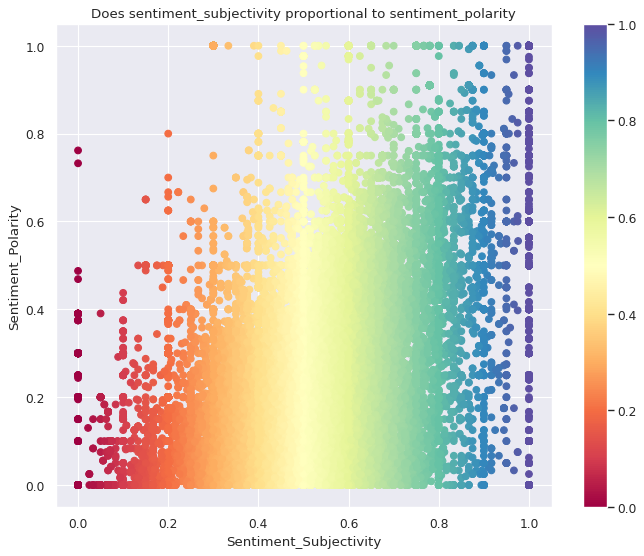

In [82]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
plt.scatter( merged_df['Sentiment_Subjectivity1'],merged_df['Sentiment_Polarity1'], c=merged_df['Sentiment_Subjectivity1'], cmap='Spectral')
plt.colorbar()
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Sentiment_Polarity')
plt.show()

##From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

## **How sentiment is divided for different type of reviews?**

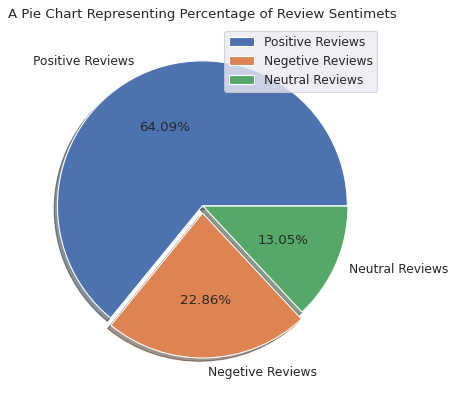

In [83]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=12)
plt.axis('off')
plt.legend()
plt.show()

#From the above pie chart, it can easily be understood that there is around 65% of user reviews sentiment is positive, around 22% of reviews sentiment is negative and the remaining around 14% of reviews sentiment is neutral.

## **what is the count of sentiment according to Category?**

In [84]:
# Creating dataframe with Installs
Size_df= play_s_d.groupby(play_s_d.Installs,as_index=True).head()
Size_df= Size_df.sort_values('Installs')

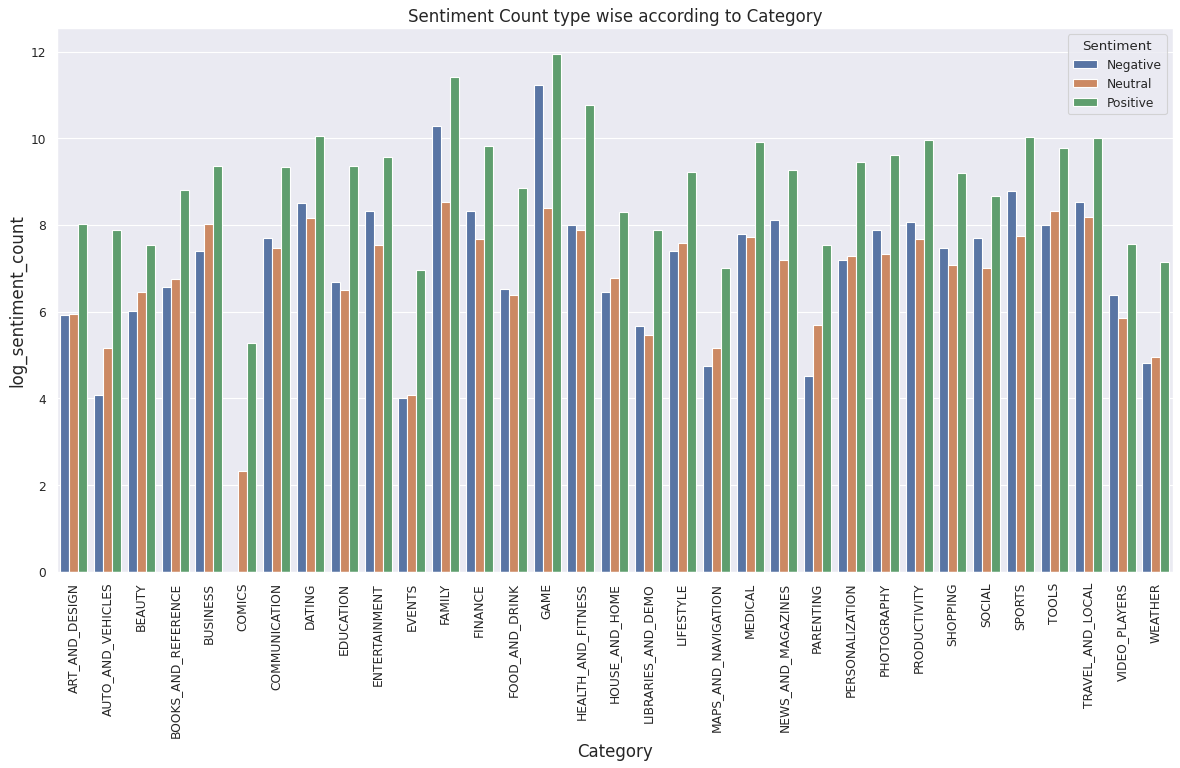

In [85]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Sentiment Count type wise according to Category",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

## **It can be seen from above plot that every category is having high Positive reviews than Negative and Neutral reviews**

#Category vs Apps vs Sentiment

Text(0.5, 1.0, 'Types of Reviews for each Category')

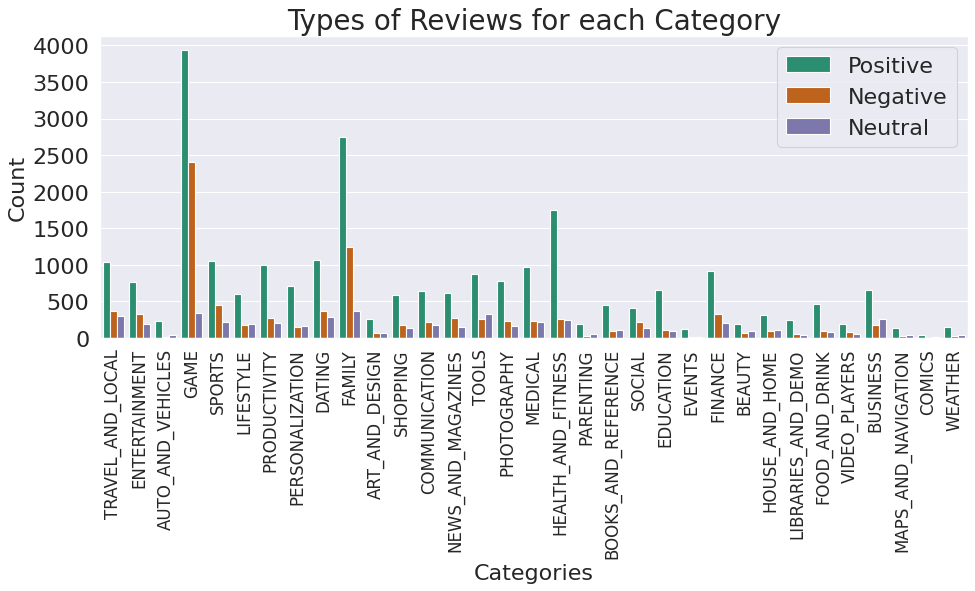

In [86]:
plt.figure(figsize=(14,5))
sns.countplot(x=merged_df['Category'],hue=merged_df['Sentiment'],orient='y',palette='Dark2')
plt.xticks(fontsize=15 , rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Categories', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(prop={'size': 20})
plt.title('Types of Reviews for each Category',fontdict={'fontsize':25})

## **Game** Category appears to have the most Positive and Negative Reviews. Shows volatility of Game Category. **Health and Fitness** appears to have least Negative reviews in relation to its positive reviews.

##**Category vs Installs**

In [87]:
grp=play_s_d.groupby('Category')
x=grp['Installs'].agg(np.sum)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)

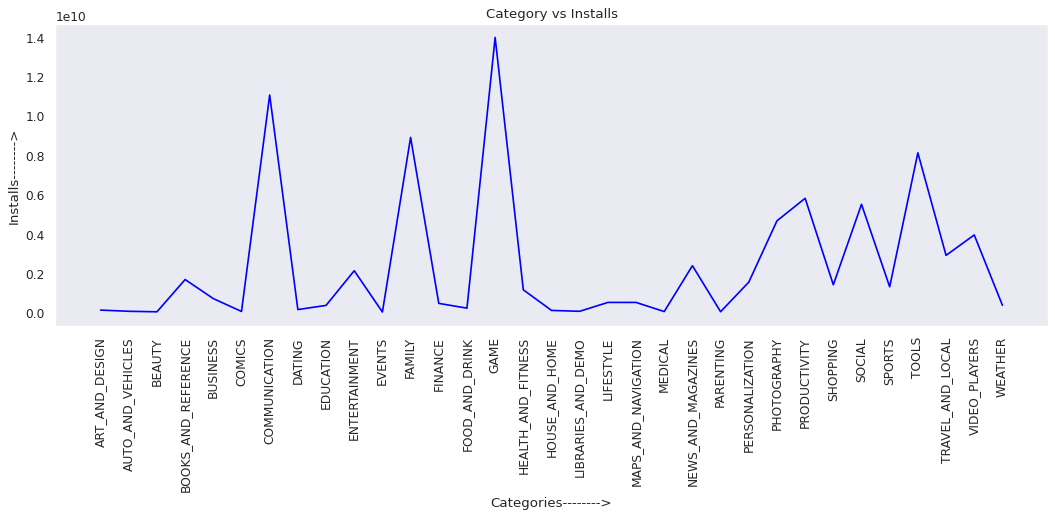

In [88]:
plt.figure(figsize=(16,5))
plt.plot(x ,  color='blue')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories-------->')
plt.ylabel('Installs-------->')
plt.grid()
plt.show()

# In This plot we can see that  Game,Communication,Family,Tools Category is having highest no of installs

# Category vs Pricing

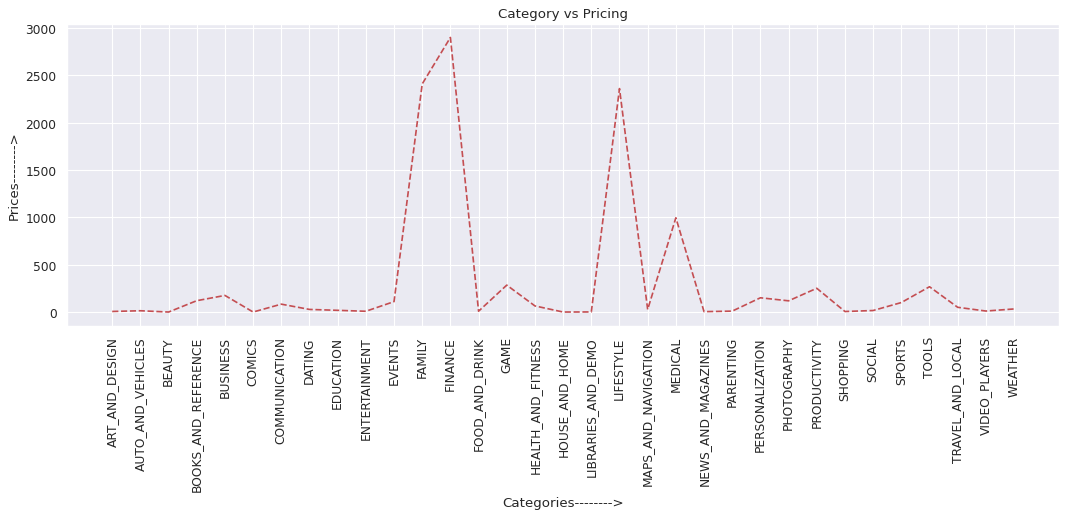

In [89]:
plt.figure(figsize=(16,5))
plt.plot(y ,'r--',  color='r')
plt.xticks(rotation=90)
plt.title('Category vs Pricing')
plt.xlabel('Categories-------->')
plt.ylabel('Prices-------->')
plt.show()

# In This plot we can see that prices are different for different Categories,Medical,Sports,Personalization is having highest prices


# Category vs Reviews

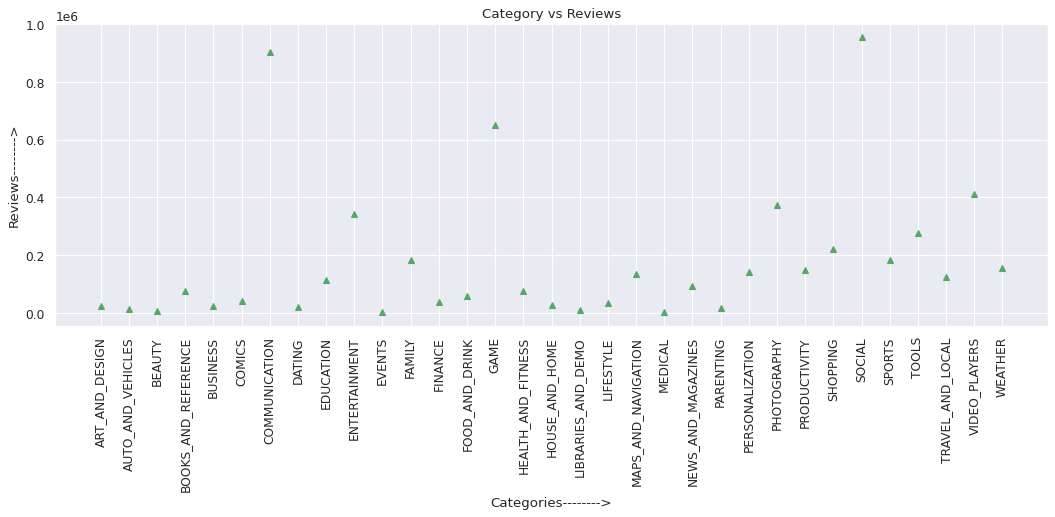

In [90]:
plt.figure(figsize=(16,5))
plt.plot(z ,'g^',  color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories-------->')
plt.ylabel('Reviews-------->')
plt.show()

# In This plot we can see that Reviews are different for different Categories,Social,Game,Photography is having highest Reviews

# Reviews vs Ratings

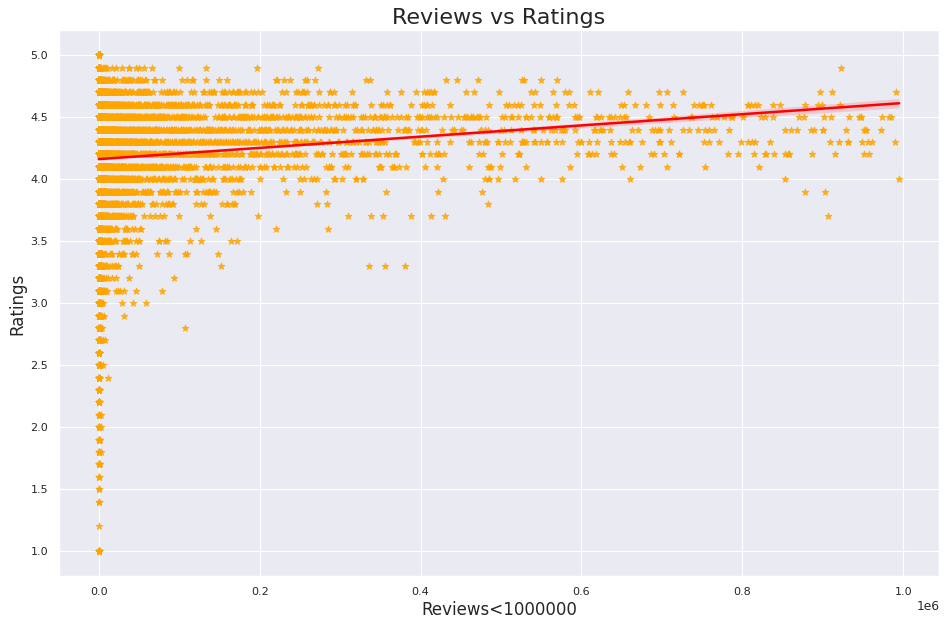

In [91]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Rating',data=play_s_d[play_s_d['Reviews']<1000000], marker="*",line_kws={"color": "red"},scatter_kws={"color": "orange"})
fig.set_xlabel("Reviews<1000000",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings',size = 20)
plt.tight_layout()

# Inference - - Obviously by looking at above scatter plot with trendline we are able to conclude that lesser the reviews on applications lesser the rating as well.

# Price vs Ratings

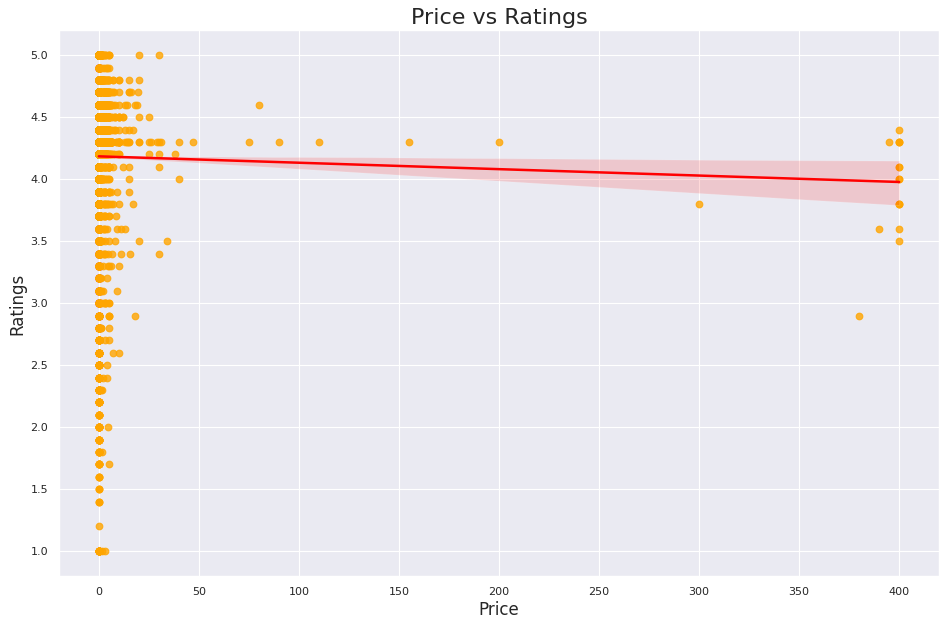

In [92]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Price',y='Rating',data=play_s_d[play_s_d['Reviews']<1000000],color='orange',line_kws={"color": "red"})
fig.set_xlabel("Price",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Price vs Ratings',size = 20)
plt.tight_layout()

# Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

## Top 10 Genres and count of application

In [93]:
top_genres = play_s_d.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})


In [94]:
genres_installs = play_s_d.groupby(['Genres'])[['App']].count()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')

top_10_genres_installs = top_genres_installs.sort_values('Count',ascending=False)[0:10]

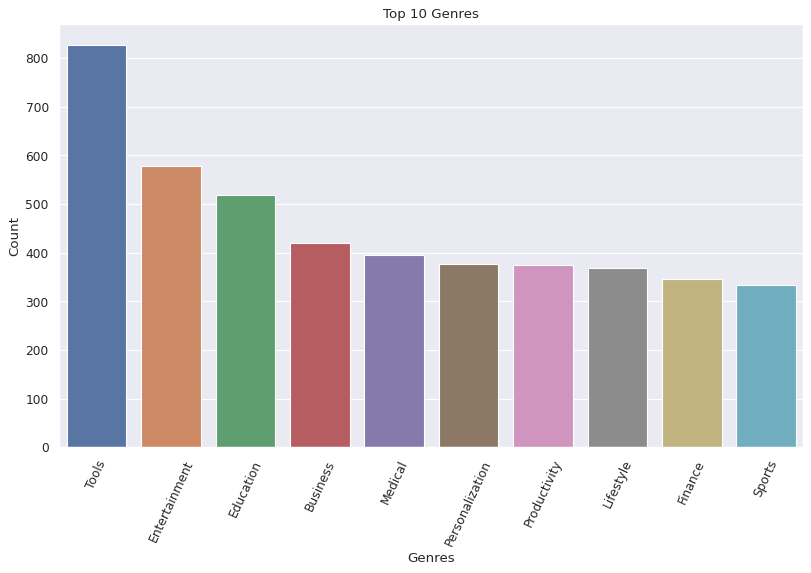

In [95]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Count of application")
plt.title("Top 10 Genres")
sns.barplot(top_10_genres_installs.Genres, top_10_genres_installs.Count)
plt.show()

## From the above graph as we can see the Tools genres is having highest number of application

In [96]:
top_genres = play_s_d.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = play_s_d.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_genres_installs['log_Installs'] = np.log2(top_genres_installs['Installs'])
top_30_genres_installed = top_genres_installs.sort_values('log_Installs',ascending=False)[0:30]

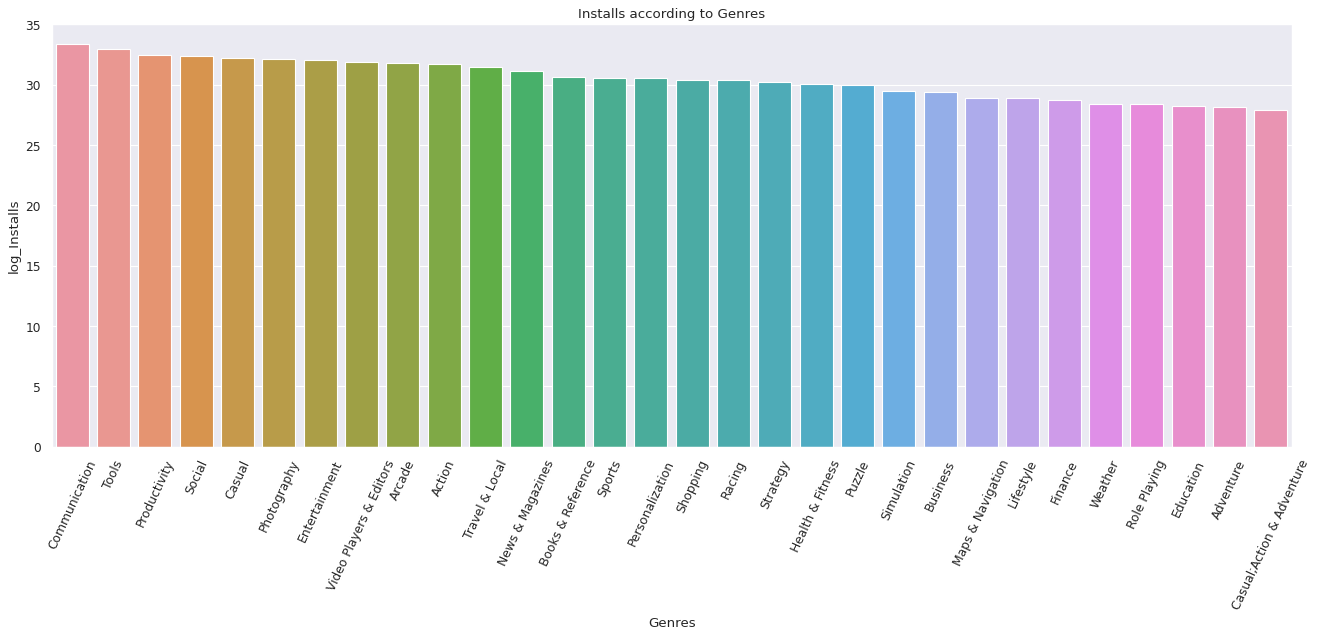

In [97]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_30_genres_installed.Genres, top_30_genres_installed.log_Installs)
plt.show()

# As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

## **what is the Average Rating of top 10 highest rated genres and top 10 lowest rated genres?**

In [98]:

genres_ratings_df = play_s_d.groupby(['Genres'])[['Rating']].mean()
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
# Highest and lowest rated Genres
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)
highest_rated_genres = genres_installs_ratings.iloc[0:10]
lowest_rated_genres = genres_installs_ratings.iloc[-10:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

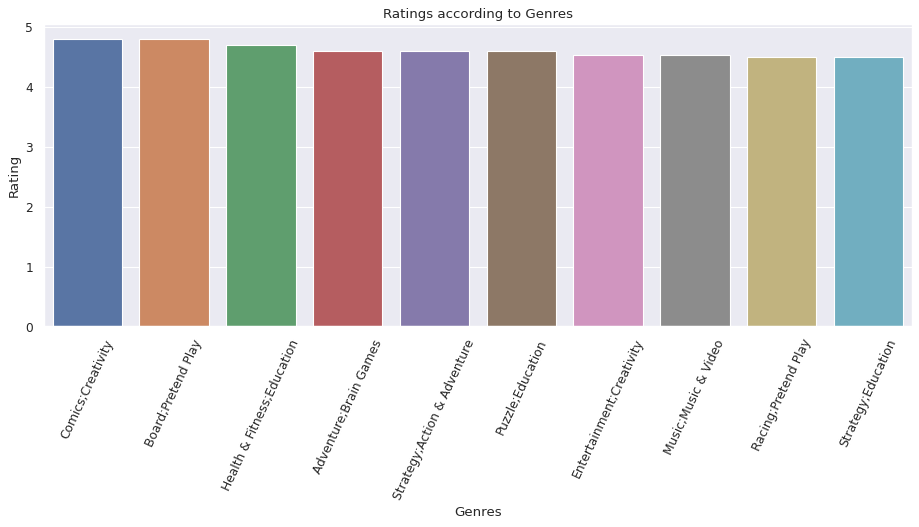

In [99]:
# Bar plot for Highest rated genres
plt.figure(figsize=(14,5))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

## **from the above plot we can see that all top 10 genres having more than 4 Average Rating**

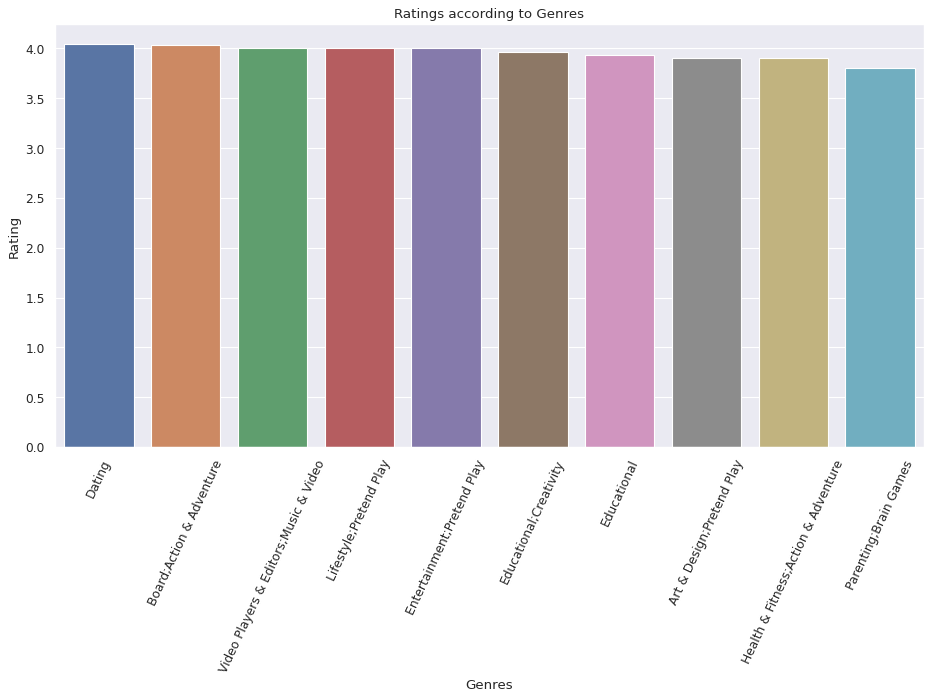

In [100]:
# Bar plot for lowest rated genres
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

## **From the above plot we can see top 10 lowest rated genres is having Average Rating of 4 or Less than 4**

#  Average rating per category

In [101]:
# Computing mean over Rating column over each apps of Category
# Let us make a dataframe storing the above intution named as mean_rating_df 
mean_rating_df=play_s_d.groupby(play_s_d.Category).mean()
mean_rating_df.reset_index(inplace=True)
mean_rating_df =mean_rating_df.sort_values(by='Rating',ascending=False)
mean_rating_df = mean_rating_df[['Category','Rating']]


In [102]:
plt.figure(figsize=(9,5))
fig=px.bar(mean_rating_df, y='Rating',x='Category',color='Rating',orientation='v',barmode='relative',
             title='Average Rating per Category',height=700,)
fig.show()

<Figure size 720x400 with 0 Axes>

## We can see from the Category vs Avg Rating graph that **Events** Category have average number of ratings with 4.39 as more and **Dating** Category with 3.9 as less.

In [103]:

free=play_s_d[play_s_d['Type']=='Free']

In [104]:
paid=play_s_d[play_s_d['Type']=='Paid']

In [105]:
# Plotting the bar plot
fig = px.bar(paid, x='Category', y='Installs',
             title='Rating vs Installs vs Type',height=700,)
fig.update_layout(title="Category vs Installs vs Type(paid)",xaxis_title="Category",yaxis_title="Installs")

fig.show()

# From above graph we can conclude that **Family** and **Game** category is having highest number of installs in Paid type

In [106]:
# Plotting the bar plot
fig = px.bar(free, x='Category', y='Installs',
             title='Rating vs Installs vs Type',height=700,)
fig.update_layout(title="Category vs Installs vs Type(Free)",xaxis_title="Category",yaxis_title="Installs",)

fig.show()

# From above graph we can conclude that **Communication** and **Game** category is having highest number of installs in Free type

# Rating vs Installs vs Type

In [107]:
# Plotting the bar plot
fig = px.bar(Size_df, x='Installs1', y='Rating',color='Type',orientation='v',barmode='relative',text='Rating',
             title='Rating vs Installs vs Type',height=700,)
fig.update_layout(title="Rating vs Installs vs Type",xaxis_title="Installs",yaxis_title="Rating",)

fig.show()

### From above graph, we clearly make up a point that Free apps having large number of installs with average rating greater than 4. Also here it shown us that paid apps having less installs upto 5000+ therefore it implements that to gain higher users- you will have to make sure your app works flawlessly and offers a full set of features. Another reason for people ignoring paid apps even with lots of great reviews, people are less likely to purchase an app if they can’t try it out first.

## **What are top category having highest number of installs  and highest number Application?**

In [108]:
top_category = play_s_d.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = play_s_d.groupby(['Category'])[['Installs']].sum()

In [109]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_category_installs['log_Installs'] = np.log2(top_category_installs['Installs'])

top_3_category_installs = top_category_installs.sort_values('log_Installs',ascending=False)[0:10]

In [110]:
category_app = play_s_d.groupby(['Category'])[['App']].count()
top_category_app=pd.merge(top_category,category_app,on='Category')
top_3_category_app = top_category_app.sort_values('Count',ascending=False)[0:10]

#**I am using 2 plots**:
# Pie plot for representing Precentage of Category based on number of count of application
# bar plot for displaying count of Installs for category

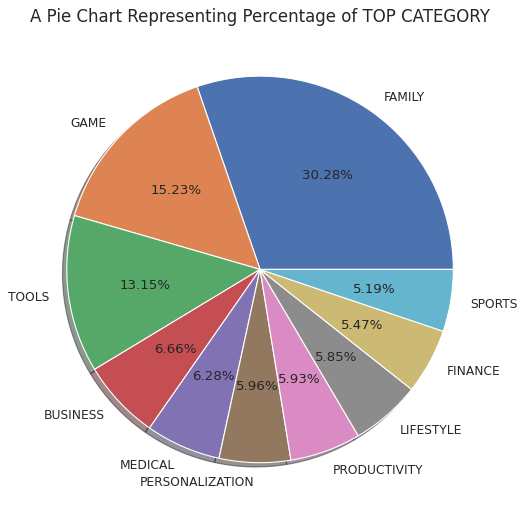

In [111]:

counts = list(top_3_category_app['App'])
labels = top_3_category_app['Category']
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of TOP CATEGORY', fontsize=15)
plt.axis('off')
# plt.legend()
plt.show()

## **As we can see from above Graph top 3 Category are Family , Game and Tools**
## **Family category is having highest number Application**

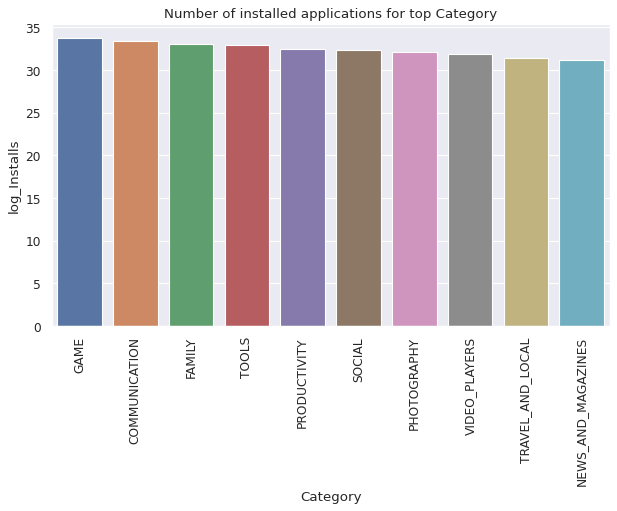

In [112]:
# Bar plot for top 3 category
plt.figure(figsize=(9,5))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for top Category")
sns.barplot(top_3_category_installs.Category, top_3_category_installs.log_Installs)
plt.show()

## **we can see the diffrence between above two graph Family category is having highest number of Application but the Game category is having highest number of installs**

## **which content rating highest number of installed Application?**

In [113]:
top_Content_Rating = play_s_d.Content_Rating.value_counts().reset_index().rename(columns={'Content_Rating':'Count','index':'Content_Rating'})
Content_Rating_installs = play_s_d.groupby(['Content_Rating'])[['Installs']].sum()
top_Content_Rating_installs = pd.merge(top_Content_Rating, Content_Rating_installs, on='Content_Rating')

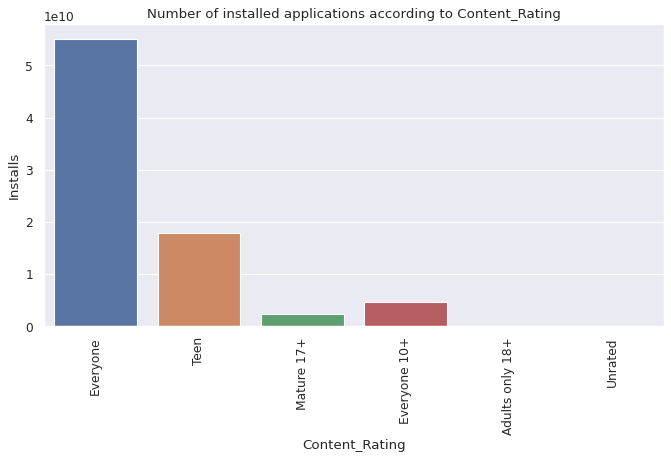

In [114]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("Content_Rating")
plt.ylabel("Installs")
plt.title("Number of installed applications according to Content_Rating")
sns.barplot(top_Content_Rating_installs.Content_Rating, top_Content_Rating_installs.Installs)
plt.show()

## **It can be seen from above plot Content Rating "Everyone" is having highest number of installed Application**

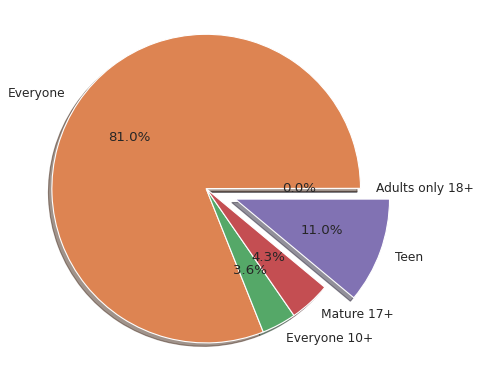

In [115]:
labels = ['Adults only 18+', 'Everyone', 'Everyone 10+' ,'Mature 17+', 'Teen']
sizes = [3 ,8382 , 373,  447 ,1143]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
myexplode = [0, 0, 0, 0,0.2]
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, explode = myexplode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('real.png', bbox_inches = 'tight',
    pad_inches = 0)
myexplode = [0.2, 0, 0, 0]
plt.show()

## **It can be seen from above plot Content Rating "Everyone" is having highest number of Application**

## **Apps which are added or updated based on year**

In [116]:
## Exctracting year from Last_Updated column
play_s_d['year'] = pd.DatetimeIndex(play_s_d['Last_Updated']).year

In [117]:
update_date=play_s_d.year.value_counts().reset_index().rename(columns={'year':'Count','index':'year'})

In [118]:
update_installs=play_s_d.groupby(['year'])[['App']].count()

In [119]:
update_type=play_s_d.groupby(['year'])[['Type']].sum()

In [120]:
update_instasll_date = pd.merge(update_date, update_installs, on='year')

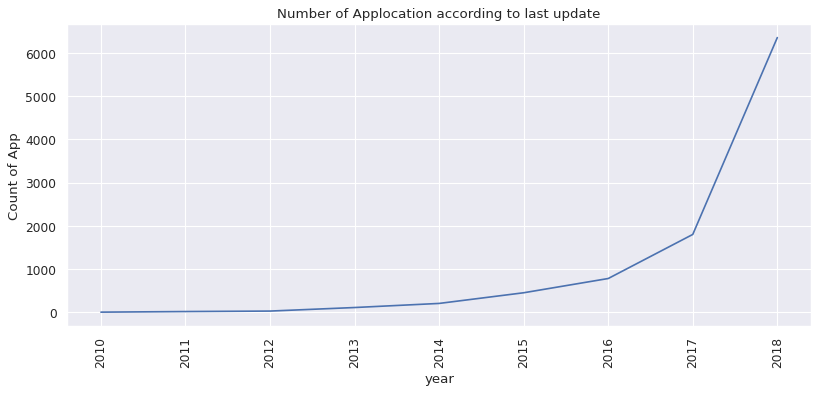

In [121]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Count of App")
plt.title("Number of Applocation according to last update")
sns.lineplot(update_instasll_date.year, update_instasll_date.App)
plt.show()

## **As we can see from Above Graph that  comparing the apps updated or added in the year 2011 and 2018  apps are increases from 80% to 90%**

##**Applications are added or updated based on month**

In [122]:
# Taking Month from last_Updated column
play_s_d['month'] = pd.DatetimeIndex(play_s_d['Last_Updated']).month

In [123]:
play_s_d['month_']=pd.DatetimeIndex(play_s_d['Last_Updated']).month_name()

In [124]:
installapp_month=play_s_d[['month','App']].groupby(['month']).count().reset_index()

In [125]:
import plotly.graph_objects as go

In [126]:

fig = px.line(installapp_month, x="month", y="App", title='Application added or updated based on month')
fig.update_traces(textposition="bottom right")
fig.show()

##**In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months.**

In [127]:
# taking app which is having maximum installs
new_df=play_s_d[play_s_d['Installs']==play_s_d['Installs'].max()]
new = new_df.groupby('App')['Installs'].sum()
new=new.reset_index()
new=new.sort_values(by=['Installs'],ascending=False)
new_=new.head(10)


Text(0, 0.5, 'No of installs')

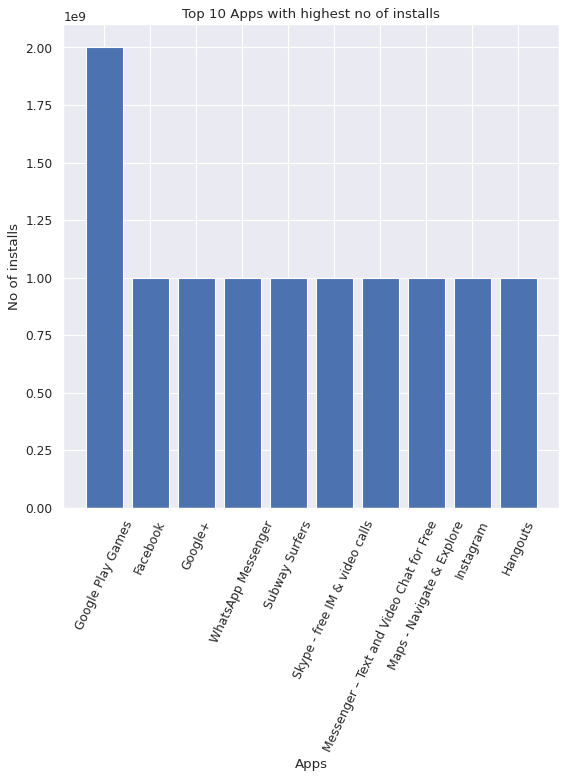

In [128]:
plt.bar(new_['App'],new_['Installs'])
plt.xticks(rotation=65)
plt.title('Top 10 Apps with highest no of installs')
plt.xlabel('Apps')
plt.ylabel('No of installs')

##**Paid apps vs Free apps**

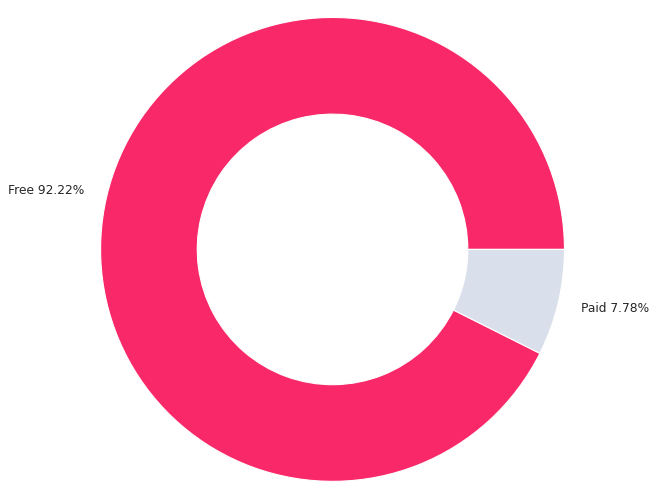

In [129]:
size_of_groups=[9592,766]

colors = ['#F92969','#D9DFEB']
mylabels = ["Free 92.22%","Paid 7.78%"]
my_pie,_ = plt.pie(size_of_groups,radius = 1.2,labels = mylabels,colors=colors)

plt.setp(my_pie, width=0.5, edgecolor='white') # 

plt.show()

##**Here we can see that 92.22% apps are free and 7.78% apps are paid on Google Play Store, so we can say that Most of the apps are free on Google Play Store.**


##**which paid app is having hightest number of user and its gener and category?**


In [130]:
paid_App=pd.DataFrame(play_s_d.loc[play_s_d['Type']=='Paid']).reset_index()

In [131]:
install_paid_app=pd.DataFrame(paid_App.loc[paid_App['Installs']==paid_App.Installs.max()])

In [132]:
install_paid_app[['App','Installs','Category','Genres','Price']]

,App,Installs,Category,Genres,Price
225,Hitman Sniper,10000000.0,GAME,Action,0.99
374,Minecraft,10000000.0,FAMILY,Arcade;Action & Adventure,6.99


##**as we can see from above output :TWO paid apps having highest number of installs  Mincraft and Hitman Sniper**

#Type vs Sentiment Polarity

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text major ticklabel objects>)

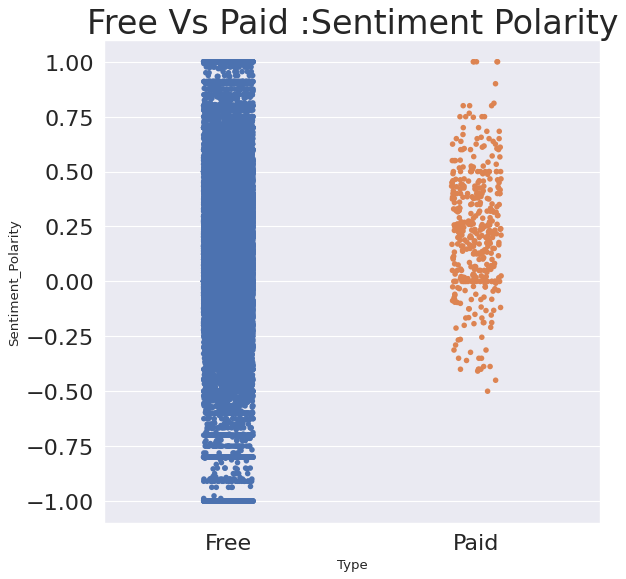

In [133]:
# Plotting the stripplot to get distribution over Type and Sentiment Polarity
plt.figure(figsize=(8,8))
sns.stripplot(x=merged_df['Type'],y=merged_df['Sentiment_Polarity'],jitter=True)
plt.title('Free Vs Paid :Sentiment Polarity',fontdict={'fontsize':30})
sns.set_style("whitegrid")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#Type vs Sentiment_Polarity graph clearly shows that **Paid Apps** are less likely to recieve bad reviews and **Free apps** have a more equal distribution of Setiment Polarity.

##**which paid app is having lowest number of user and its gener and category?**


In [134]:
install_paid_app2=pd.DataFrame(paid_App.loc[paid_App['Installs']==paid_App.Installs.min()])

In [135]:
install_paid_app2[['App','Installs','Category','Genres','Price','year']].reset_index()

,index,App,Installs,Category,Genres,Price,year
0,683,Ain Arabic Kids Alif Ba ta,0.0,FAMILY,Education,2.99,2016
1,686,Ak Parti Yardım Toplama,0.0,SOCIAL,Social,13.99,2017
2,690,EG | Explore Folegandros,0.0,TRAVEL_AND_LOCAL,Travel & Local,3.99,2017
3,706,cronometra-br,0.0,PRODUCTIVITY,Productivity,154.99,2017
4,719,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0,LIFESTYLE,Lifestyle,399.99,2017
5,726,Eu sou Rico,0.0,FINANCE,Finance,30.99,2018
6,729,Eu Sou Rico,0.0,FINANCE,Finance,394.99,2018
7,732,Popsicle Launcher for Android P 9.0 launcher,0.0,PERSONALIZATION,Personalization,1.49,2018
8,742,EP Cook Book,0.0,MEDICAL,Medical,200.00,2015
9,754,AP Series Solution Pro,0.0,FAMILY,Education,1.99,2017


##**We can see from above output there are 10 Paid apps which does not have any user**

# Type vs Year

In [136]:
update_installs=play_s_d.groupby(['year','Type']).size().reset_index(name='yearCount')

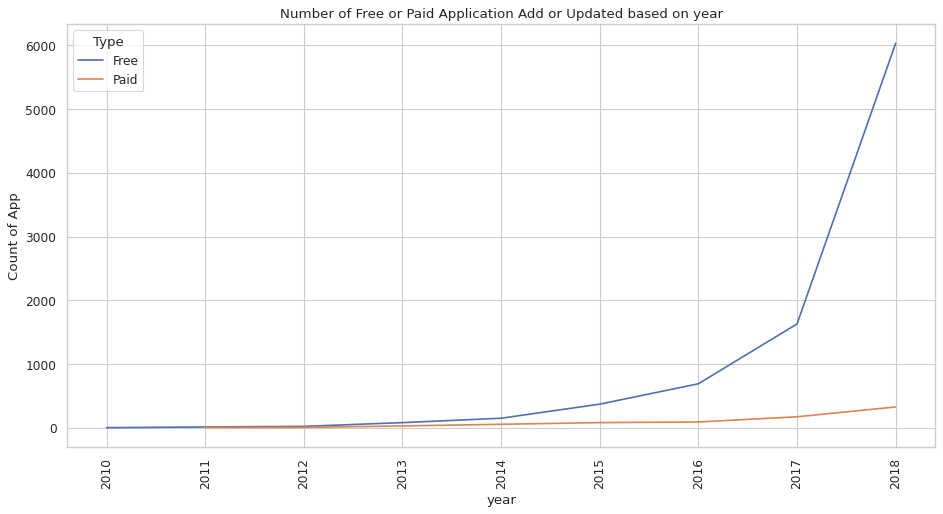

In [137]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Count of App")
plt.title("Number of Free or Paid Application Add or Updated based on year")
sns.lineplot('year','yearCount',hue='Type',data=update_installs)
plt.show()

##**By observing above plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps.**

# Type vs Month

In [138]:
installapp_month=play_s_d.groupby(['month','Type']).size().reset_index(name='Count of App')

In [139]:
fig = px.line(installapp_month, x='month', y='Count of App', color='Type')
fig.show()

## **From above plot we can see that Free apps are more frequently added or updated as compare to Paid apps**

# Price vs Category vs Type 

Text(0.5, 1.0, 'Price vs Category')

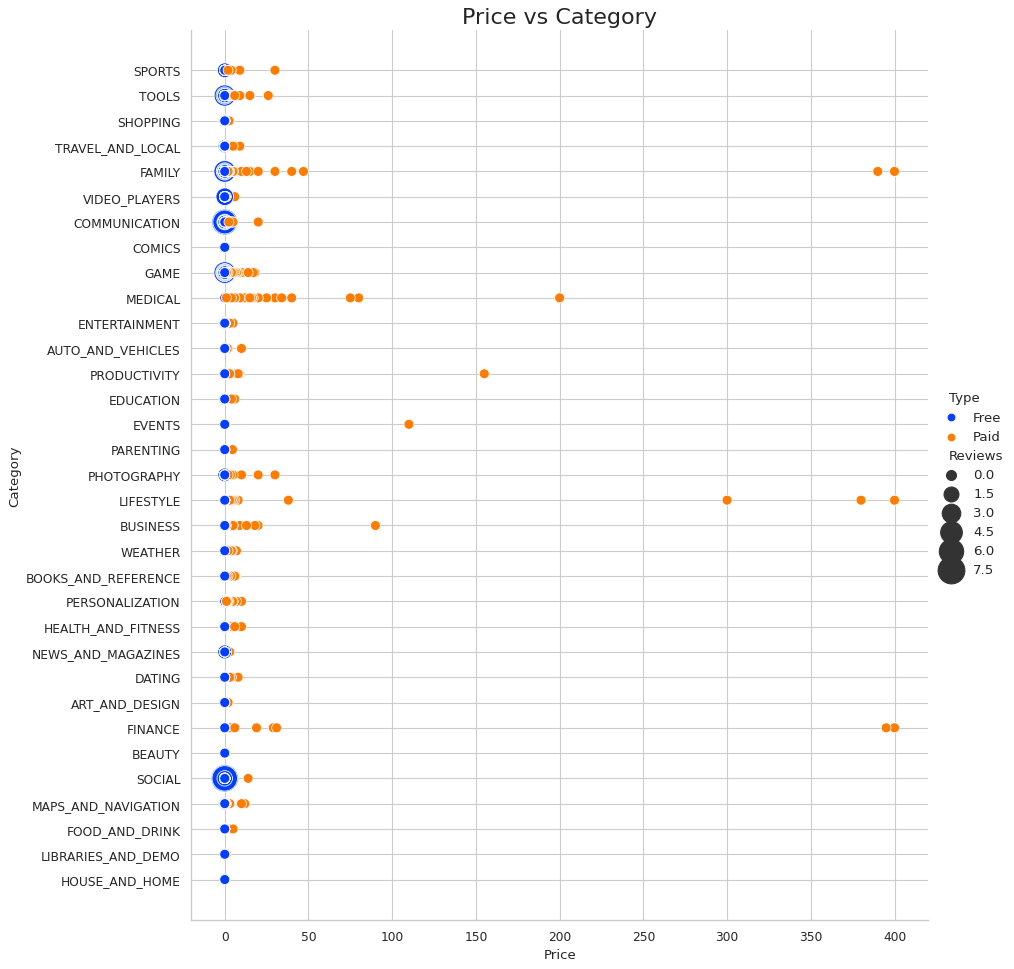

In [140]:
# Plotting relplot for visualizing statistical relationships between scatter plots and line plots.
sns.relplot(y="Category", x="Price", hue="Type", size="Reviews", sizes=(80, 600), alpha=1, palette="bright", height=12, data=play_s_d)
plt.title('Price vs Category', fontsize=20)

## Price Vs Ratings plot delivers that Type of Apps is either PAID or FREE, Circle is larger if Reviews are more. **Social,** **Family,** **Communication,** **Family,** **Tools** Categories have highest number of reviews. **Finance,** **Lifestyle,** **Family** have high price in paid apps. There we can observe from plot points that **Medical** and **Family** Category have more number of paid apps.

In [141]:
data_new=play_s_d[  (play_s_d['Type']=='Free')]
data_new[['Content_Rating','Installs','Reviews']].sort_values('Installs',ascending=False)
data_new['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [142]:
data_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Installs1,year,month,month_
2989,GollerCepte Live Score,SPORTS,4.2,9992,31.000000,1000000.0,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,"1,000,000+",2018,5,May
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.088867,100000.0,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,"100,000+",2013,12,December
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18.000000,1000000.0,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,"1,000,000+",2018,1,January
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.000000,1000000.0,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,"1,000,000+",2018,6,June
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.000000,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,"500,000+",2018,8,August


#Updated Free App vs Month

In [143]:
update_date=play_s_d[['month','Type']].value_counts().reset_index().sort_values(by='month').rename(columns={'month':'month','index':'month'})

In [144]:
# Changing column name
update_date.rename(columns={0:'count_ofApp'},inplace=True)

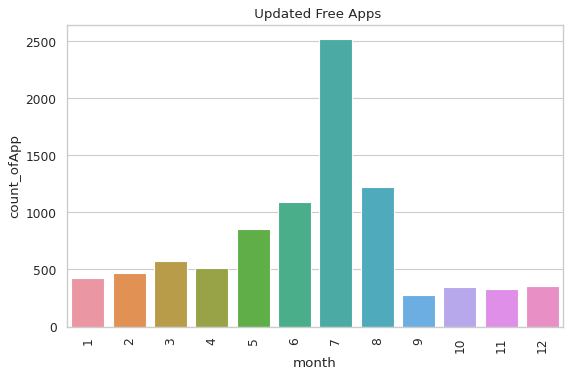

In [145]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.title(' Updated Free Apps')
free_update=update_date.loc[update_date['Type']=='Free'].sort_values(by='month')
sns.barplot(free_update.month, free_update.count_ofApp)

##**In this  almost 50% free apps are added or updated on the month of July**

#Updated Paid Apps vs Month

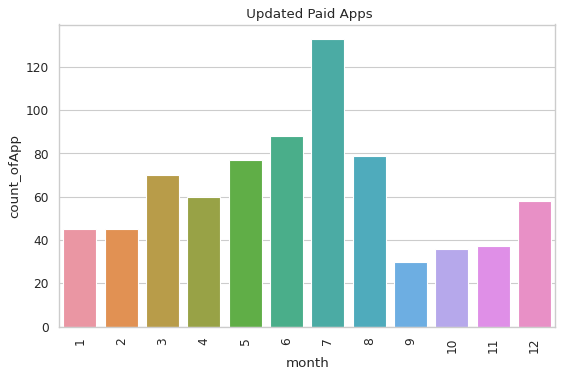

In [146]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.title(' Updated Paid Apps')
paid_update=update_date.loc[update_date['Type']=='Paid'].sort_values(by='month')
sns.barplot(paid_update.month, paid_update.count_ofApp)

##**Same as free apps most of the paid apps too updates in the month of July**

## **Current Version of Application**

In [147]:
version_type=play_s_d.Current_Ver.value_counts().reset_index().rename(columns={'Current_Ver':'Count','index':'Current_Ver'})
version_installed=play_s_d.groupby(['Current_Ver'])[['App']].count()
current_versions = pd.merge(version_type, version_installed, on='Current_Ver').sort_values('Count',ascending=False)[:20]

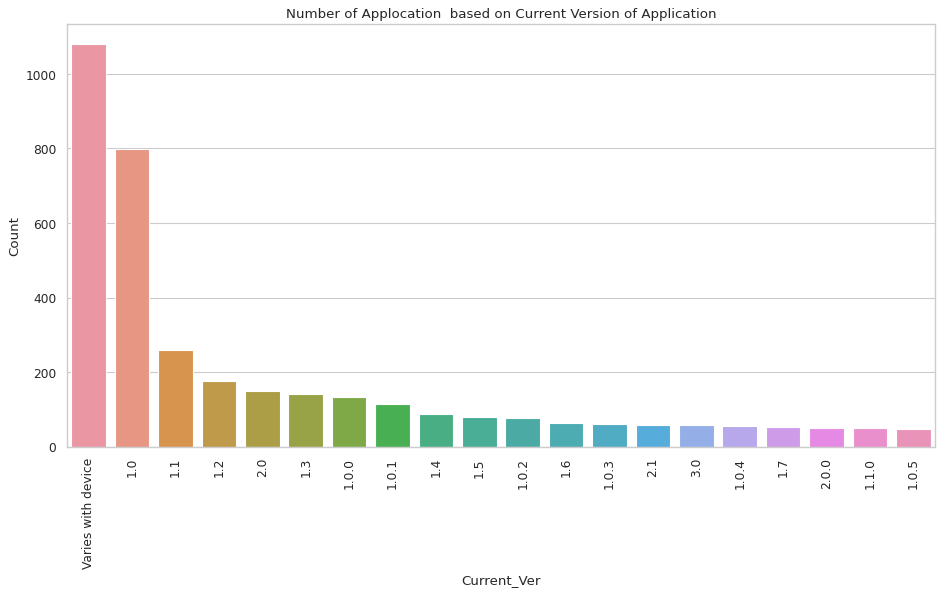

In [148]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Version")
plt.ylabel("")
plt.title("Number of Applocation  based on Current Version of Application")
sns.barplot(current_versions.Current_Ver,'Count',data=current_versions)
plt.show()


## **we can see from above plot most of the Applications are having Current version "Varies with device" and version "1.0"**

## **Andriod Version requirement of Apps**

In [149]:
version_type=play_s_d.Android_Ver.value_counts().reset_index().rename(columns={'Android_Ver':'Count','index':'Android_Ver'})
version_installed=play_s_d.groupby(['Android_Ver'])[['App']].count()
versions_ = pd.merge(version_type, version_installed, on='Android_Ver')[:20]

In [150]:

fig = go.Figure(data=[go.Bar(
            x=versions_.Android_Ver, y=versions_.Count,
            text=versions_.Android_Ver,
            
        )])

fig.show()

##**By observing above plot we can conclude that most of the Applications requirement of Android version is 4.1 and up**

In [151]:
size_app=play_s_d.groupby(['Size'])['App'].count().reset_index().sort_values('App',ascending=False)[0:20]

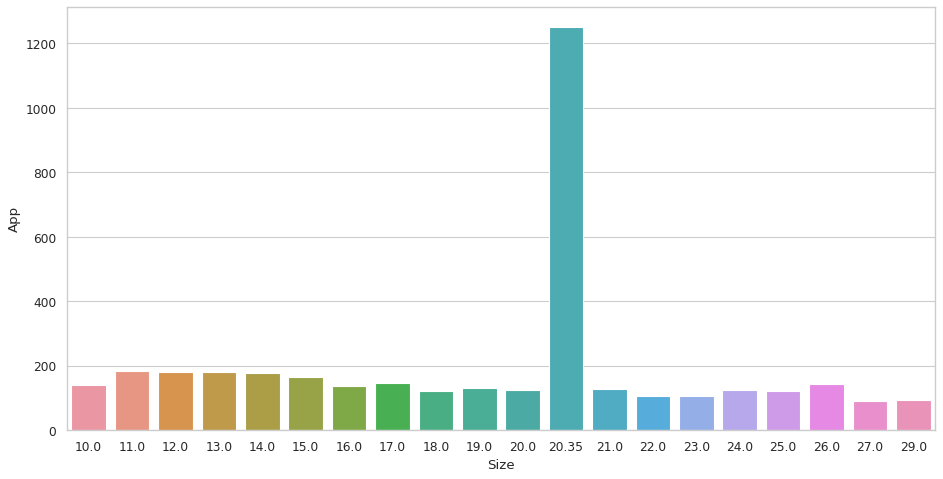

In [152]:
plt.figure(figsize=(14,7))
sns.barplot(size_app.Size,size_app.App)

# Size vs Installs

In [153]:
# Plotting the Pie chart
fig = px.pie(Size_df, values='Installs', names='Size', title='Installs vs Size')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### App Size will be one of the most focused area when developing the app. From Pie chart there is something developer needs to keep in mind that our app size should be in the range of 20 to 30 MB. Users prefered to download the apps which has minimum size.

# Installs with rating

In [154]:
# Forming dataframe with Rating and Installs 
installs_rate = play_s_d.groupby('Rating')['Installs'].max().reset_index()

In [155]:
# Plotting the bar plot
fig=px.bar(installs_rate, y='Installs',x='Rating',color='Installs',text='Rating',title='Rating vs Installs')
fig.show()

## Apps with approximate Rating range between 4 to 4.5 have more likely 1B+ 

# Content Rating vs Category

In [156]:
# Creating the dataframe for Content rating and Installs in each category
content_df = play_s_d.groupby(play_s_d.Installs,as_index=True).head()

In [157]:
# Plotting the bar plot with Content Rating on x-axis and Installs on y-axis
fig=px.bar(content_df, y='Installs',x='Content_Rating',color='Category',text='Installs',orientation='v',barmode='relative',
             title='Number of Installs for each Category in Content Rating',height=700,)
fig.show()

### Here if we make app like its content is more accessible to **Everyone** then we have more number of Installs in terms of user access. Also we can hover from above and easily make a statement that **Video Players** Category have more number of Installs in Teen type content.

In [158]:
# Displaying no. of game apps
game_apps = play_s_d[play_s_d['Category']==('GAME')]
print('The dataset contains '+ (str((game_apps.App.nunique())))+ ' game apps.')

The dataset contains 960 game apps.


In [159]:
# Acquaintaining the Genres for game Category
game_df = game_apps[game_apps['Category']==('GAME')]
game_df = game_df[['Genres', 'Installs']]
game_genre_df = game_df.groupby('Genres').count().sort_values(by='Installs',ascending=False)
game_genre_df = game_genre_df.nlargest(10, 'Installs', keep='first')


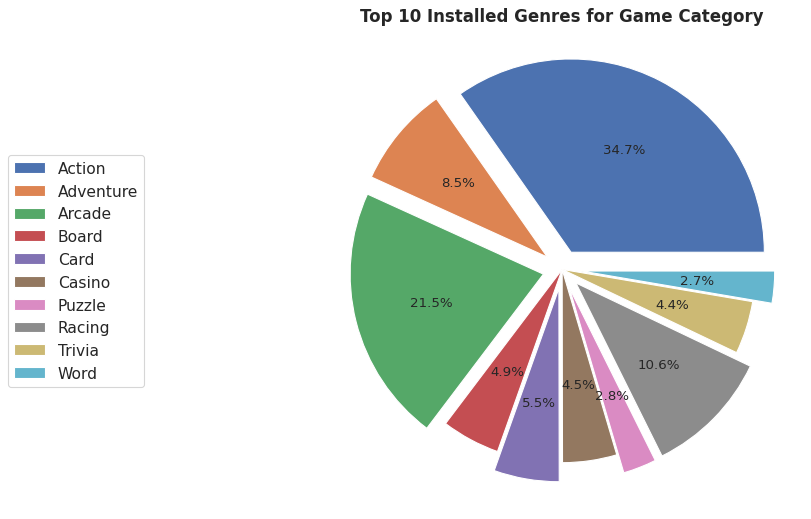

In [160]:
# Let us plot Pie chart for top 10 installed apps in Game Category
top_10_genres=game_genre_df.groupby("Genres")["Installs"].sum()
fig7, ax = plt.subplots(figsize = (10,8))
explode = (0.1,0.1,0.1,0,0.1,0,0.1,0.1,0,0.1)
labels=top_10_genres.index
ax.set(facecolor = 'grey')
pie = plt.pie(top_10_genres, explode= explode,startangle=0,autopct='%1.1f%%')
plt.legend(pie[0],labels, bbox_to_anchor=(0,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure,)
plt.title('Top 10 Installed Genres for Game Category', fontsize = 15, fontweight='bold')
plt.show()

# Here we can conclude from graph that **Action** Genres for Game have more number of downloads followed by **Arcade**.

# Category wise Count of apps per year

In [161]:
# Counting the Apps within in each Category over all Columns and saving it in Category_df dataframe

Category_df=play_s_d.groupby(['Category','year']).count().reset_index()
Category_df.reset_index(inplace=True)
Category_df = Category_df[['Category', 'App','year']]


In [162]:
# Plotting the barplot with Installs on x-axis and Year on y-axis and grouping them with category
fig = px.bar(Category_df, x='App', y='year',color='Category',orientation='h',barmode='relative',text='App',
             title='Category wise Count of apps per year',height=600,)

fig.show()

# **Family** Category have high number of Application  and if we move from year then we can also see the change in number of apps.

#**Conclusion:**
##As per our EDA, an ideal application on the google play store should obey the following properties/characteristics
##1. Category Type: Before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 80%% to 96% and paid apps are gone from 20% to 4%. So, we can conclude that most people are after free apps.
##2. Installs vs Rating: Some Semi-popular apps are crossing a Million and then 10 Million, and only a few apps are able to go beyond the 500M and 1B mark. Popular apps under Social media category like Facebook, WhatsApp, Instagram have more than 1B installations.
##3. Rating vs Installs vs Type: Free apps are preferred over paid apps and the rating are in range of 4 to 5.Therefore the free Apps are most downloaded as compared to paid apps, Hence Developer should focus more on free apps.User prefer more of free apps.Most of the apps present in playstore are more or less of same size so size doesn’t affect their decision much.
##4. The most installed category: As we have explored applications belong to the category gaming and followed bycommunication are being installed the most , this is the clue to choose the category
##5. User Reviews : User Reviews often contain valuable feedback and suggestions for improving the app. Analyzing the top trends and issues for app enables us to assess which parts of the app or game to focus on. It also shows where to invest in the business to improve the offering and create a more successful app or game.
##6. Ratings : App rating is a reflection of how users respond to app. Learn what affects rating and what we can do to influence it.

#Thank You Guys!